<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import math
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from random import shuffle
from scipy import stats

In [3]:
data = pd.read_excel("/content/Load Data in kW.xlsx")
data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [4]:
data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


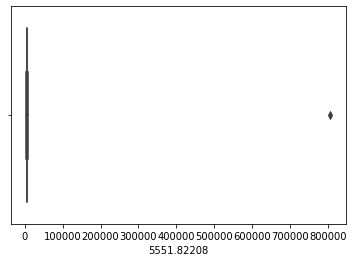

In [10]:
sns.boxplot(data.iloc[:,0])

In [12]:
z = np.abs(stats.zscore(data))
print(z)

[[0.08229398]
 [0.08782374]
 [0.07705526]
 ...
 [0.09743715]
 [0.07254415]
 [0.03178457]]


{'boxes': [<matplotlib.lines.Line2D at 0x7f3118642390>],
 'caps': [<matplotlib.lines.Line2D at 0x7f311864b6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f31185d6110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f31185d6790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3118642f50>,
  <matplotlib.lines.Line2D at 0x7f311864b690>]}

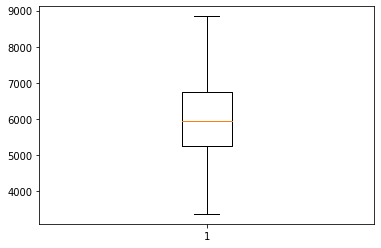

In [13]:
data.iloc[928,0] = data.iloc[927,0]
plt.boxplot(data.iloc[:,0])

In [17]:
x = []
y = []
for i in range(len(data.iloc[:,0])-24):
  x.append(data.iloc[i,0])
  y.append(data.iloc[i+24,0])

In [24]:
x = minmax_scale(x)
y = minmax_scale(y)
data_n= []
for i in range(len(x)):
  data_n.append((x[i],y[i]))
print(len(data_n))
train_data_n,test_data_n = train_test_split(data_n,test_size=0.1)
len(train_data_n)

2159


1943

In [31]:
m = 1
c = 1
learning_rate = 0.01
epochs = 20
momentum_coefficient= 0.9
batch_size = 500
v_m = 0
v_c = 0
def gradient_of_m(d,m,c,v_m,v_c,momentum_coefficient):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coefficient*v_m)*d[i][0]-(c+momentum_coefficient*v_c))*d[i][0]
  return -1*sum/len(d)
def gradient_of_c(d,m,c,v_m,v_c,momentum_coefficient):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-(m+momentum_coefficient*v_m)*d[i][0]-(c+momentum_coefficient*v_c))
  return -1*sum/len(d)
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

In [37]:
error_list = []
number_of_batches = (len(train_data_n)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = train_data_n[j*batch_size:]
    else:
      d = train_data_n[j*batch_size:(j+1)*batch_size]
    delta_m = -1*learning_rate*gradient_of_m(d,m,c,v_m,v_c,momentum_coefficient)
    delta_c = -1*learning_rate*gradient_of_c(d,m,c,v_m,v_c,momentum_coefficient)
    v_m = v_m*momentum_coefficient + delta_m
    v_c = v_c*momentum_coefficient + delta_c
    m = m + v_m
    c = c + v_c
    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
random.shuffle(train_data_n)

epoch 0, batch 0, error 0.00785212100746273
epoch 0, batch 1, error 0.0074780887463878395
epoch 0, batch 2, error 0.009809825770539732
epoch 0, batch 3, error 0.009250907094118863
epoch 1, batch 0, error 0.007850957526436017
epoch 1, batch 1, error 0.007474115938080943
epoch 1, batch 2, error 0.009807656106069837
epoch 1, batch 3, error 0.009249094027839574
epoch 2, batch 0, error 0.007849833330867407
epoch 2, batch 1, error 0.007470221585180258
epoch 2, batch 2, error 0.00980554132125174
epoch 2, batch 3, error 0.009247331231292236
epoch 3, batch 0, error 0.007848747316939714
epoch 3, batch 1, error 0.007466404052294622
epoch 3, batch 2, error 0.009803479977188837
epoch 3, batch 3, error 0.009245617432927717
epoch 4, batch 0, error 0.007847698408123797
epoch 4, batch 1, error 0.0074626617458466915
epoch 4, batch 2, error 0.009801470671299151
epoch 4, batch 3, error 0.009243951389758672
epoch 5, batch 0, error 0.007846685556955921
epoch 5, batch 1, error 0.007458993101501849
epoch 5, b

Text(0.5, 1.0, 'error graph')

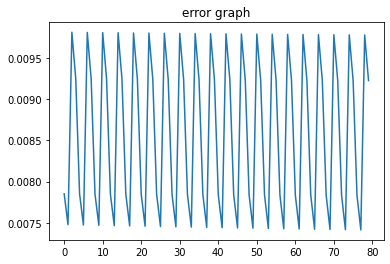

In [38]:
x_1 = range(len(error_list))
y_1 = error_list
plt.plot(x_1,y_1)
plt.title("error graph")

In [40]:
print("train error :",error(train_data_n,m,c))
print("test error :",error(test_data_n,m,c))
print(m,c)

train error : 0.00854280455308464
test error : 0.009548800153502976
0.688218467056412 0.15176861503069955


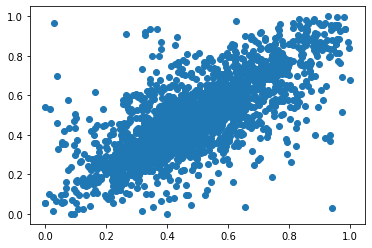

In [41]:
plt.scatter(x,y)

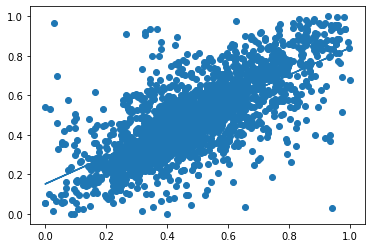

In [42]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [46]:
input_load = float(input("enter yesterday load at this time : "))
maximum_value = 8841.669480
minimum_value = 3377.919600
input_load = (input_load - minimum_value)/(maximum_value-minimum_value)
output_load = input_load*m+c
output_load = output_load*(maximum_value-minimum_value)+minimum_value
print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 5555.5
predicted load for this hour is :  5705.79639694184
